In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pywt
from pywt import wavedecn
from PIL import Image, ImageOps
from structured_random_features.src.models.weights import V1_weights
from sklearn.linear_model import Lasso
from src.V1_reconst import reconstruct, generate_V1_variables

import seaborn as sns
import pandas as pd

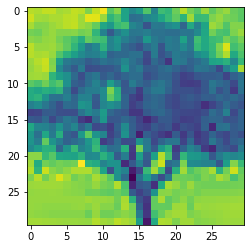

In [2]:
image_nm = 'image/tree_part1.jpg'
img = Image.open(image_nm)
img = ImageOps.grayscale(img)
img_arr = np.asarray(img)
plt.imshow(img_arr)


(30, 30)


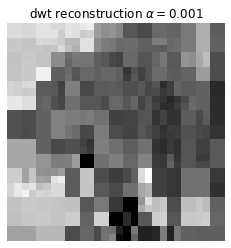

(30, 30)


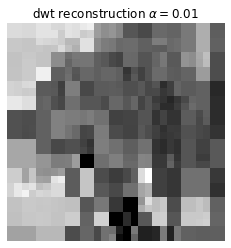

(30, 30)


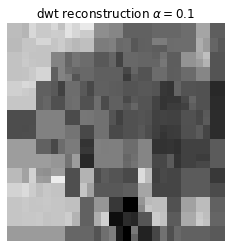

(30, 30)


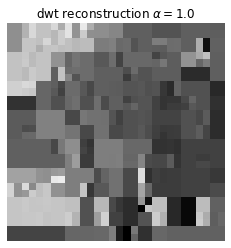

(30, 30)


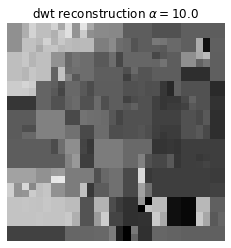

(30, 30)


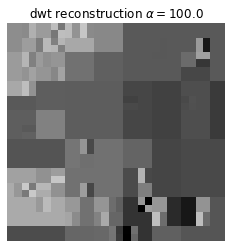

(30, 30)


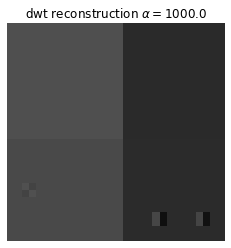

<Figure size 432x288 with 0 Axes>

In [8]:
# Compute Samples
n, m = img_arr.shape
samp = np.floor(n * m * .2).astype(int)
rand_index = np.random.randint(0, n * m, samp)
y = img_arr.flatten()[rand_index].reshape(samp, 1)

y = y * np.sqrt(n * m)
C = np.eye(n * m)[rand_index, :] * np.sqrt(n * m)
C3D = C.reshape(samp, n, m)
# num_cell = samp
# sparse_freq = 2
# cell_size = 5

# C3D, y = generate_V1_variables(num_cell, cell_size, sparse_freq, img_arr)


# hyperparameter values
alpha_list = np.logspace(-3, 3, 7)
lv = 4
w = 'db1'

for alpha in alpha_list:
    # Determine theta size with one run of wavedecn
    dwt_sample = wavedecn(C3D[0], wavelet = w, level = lv)
    coeff, coeff_slices, coeff_shapes = pywt.ravel_coeffs(dwt_sample)
    theta = np.zeros((len(C3D), len(coeff)))
    theta[0, :] = coeff 

    # Loop the wavedecn to fill theta
    for i in range(samp):
        theta_i = wavedecn(C3D[i], wavelet= w, level = lv)
        theta[i, :] = pywt.ravel_coeffs(theta_i)[0]

    mini = Lasso(alpha = alpha, fit_intercept = False)
    mini.fit(theta, y)

    s = mini.coef_

    s_unravel = pywt.unravel_coeffs(s, coeff_slices, coeff_shapes)
    reconst = pywt.waverecn(s_unravel, w)

    plt.imshow(reconst, 'gray', vmin = 0, vmax = 255)
    plt.axis('off')
    plt.title(r'dwt reconstruction $\alpha = {alp}$'.format(alp = alpha))
    plt.show()
    plt.savefig("result/tree_part1/dwt/{alp}_reconst.png".format(alp = alpha).replace(" ", "_"), dpi = 300, transparent = True)

<AxesSubplot:>

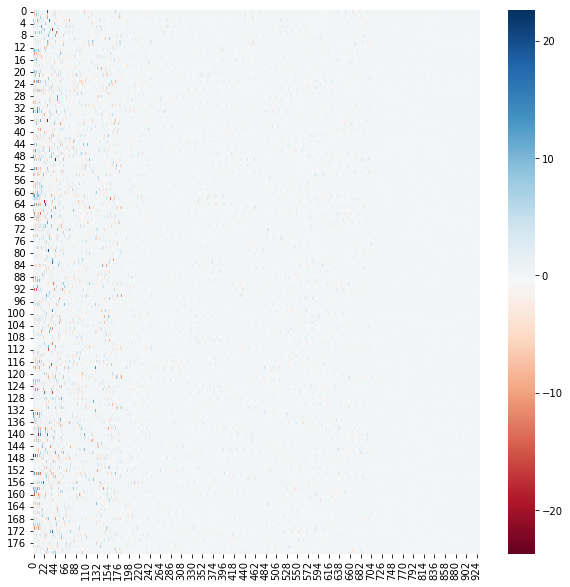

In [7]:
plt.figure(figsize=(10,10))
sns.heatmap(theta, cmap = "RdBu")#, vmin = 0, vmax = 255)

In [235]:
s

array([ 2.05847116e+03,  1.38598124e+03,  2.11566555e+03,  1.72138799e+03,
        2.65725225e+02, -0.00000000e+00,  1.76549669e+02,  1.11111457e+02,
        4.21135107e+02,  4.16936650e+02, -6.47317672e+01, -8.67206455e+01,
        1.43139073e+02, -0.00000000e+00,  5.26455791e+01,  0.00000000e+00,
        0.00000000e+00,  1.98760448e+00, -5.57181286e+01,  7.98804446e+01,
        4.08780704e+01,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  1.15269812e+02,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  1.08459412e+02, -7.85965792e+01,  1.32995535e+02,
        0.00000000e+00,  1.51517611e+02,  6.09015765e+00, -0.00000000e+00,
        2.80672984e+01,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -2.56187498e+02, -2.22318240e+01, -2.31974321e+02, -1.50839268e+02,
        2.56903142e+02,  1.71575371e+02,  1.86756009e+02,  2.12996099e+02,
       -7.51674749e+01,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -